In [19]:
import networkx as nx
import numpy as np
import pandas as pd

from timeit import timeit
from random import sample
from copy import deepcopy as dp
from matplotlib import pyplot as plt

## Generate and plot graph

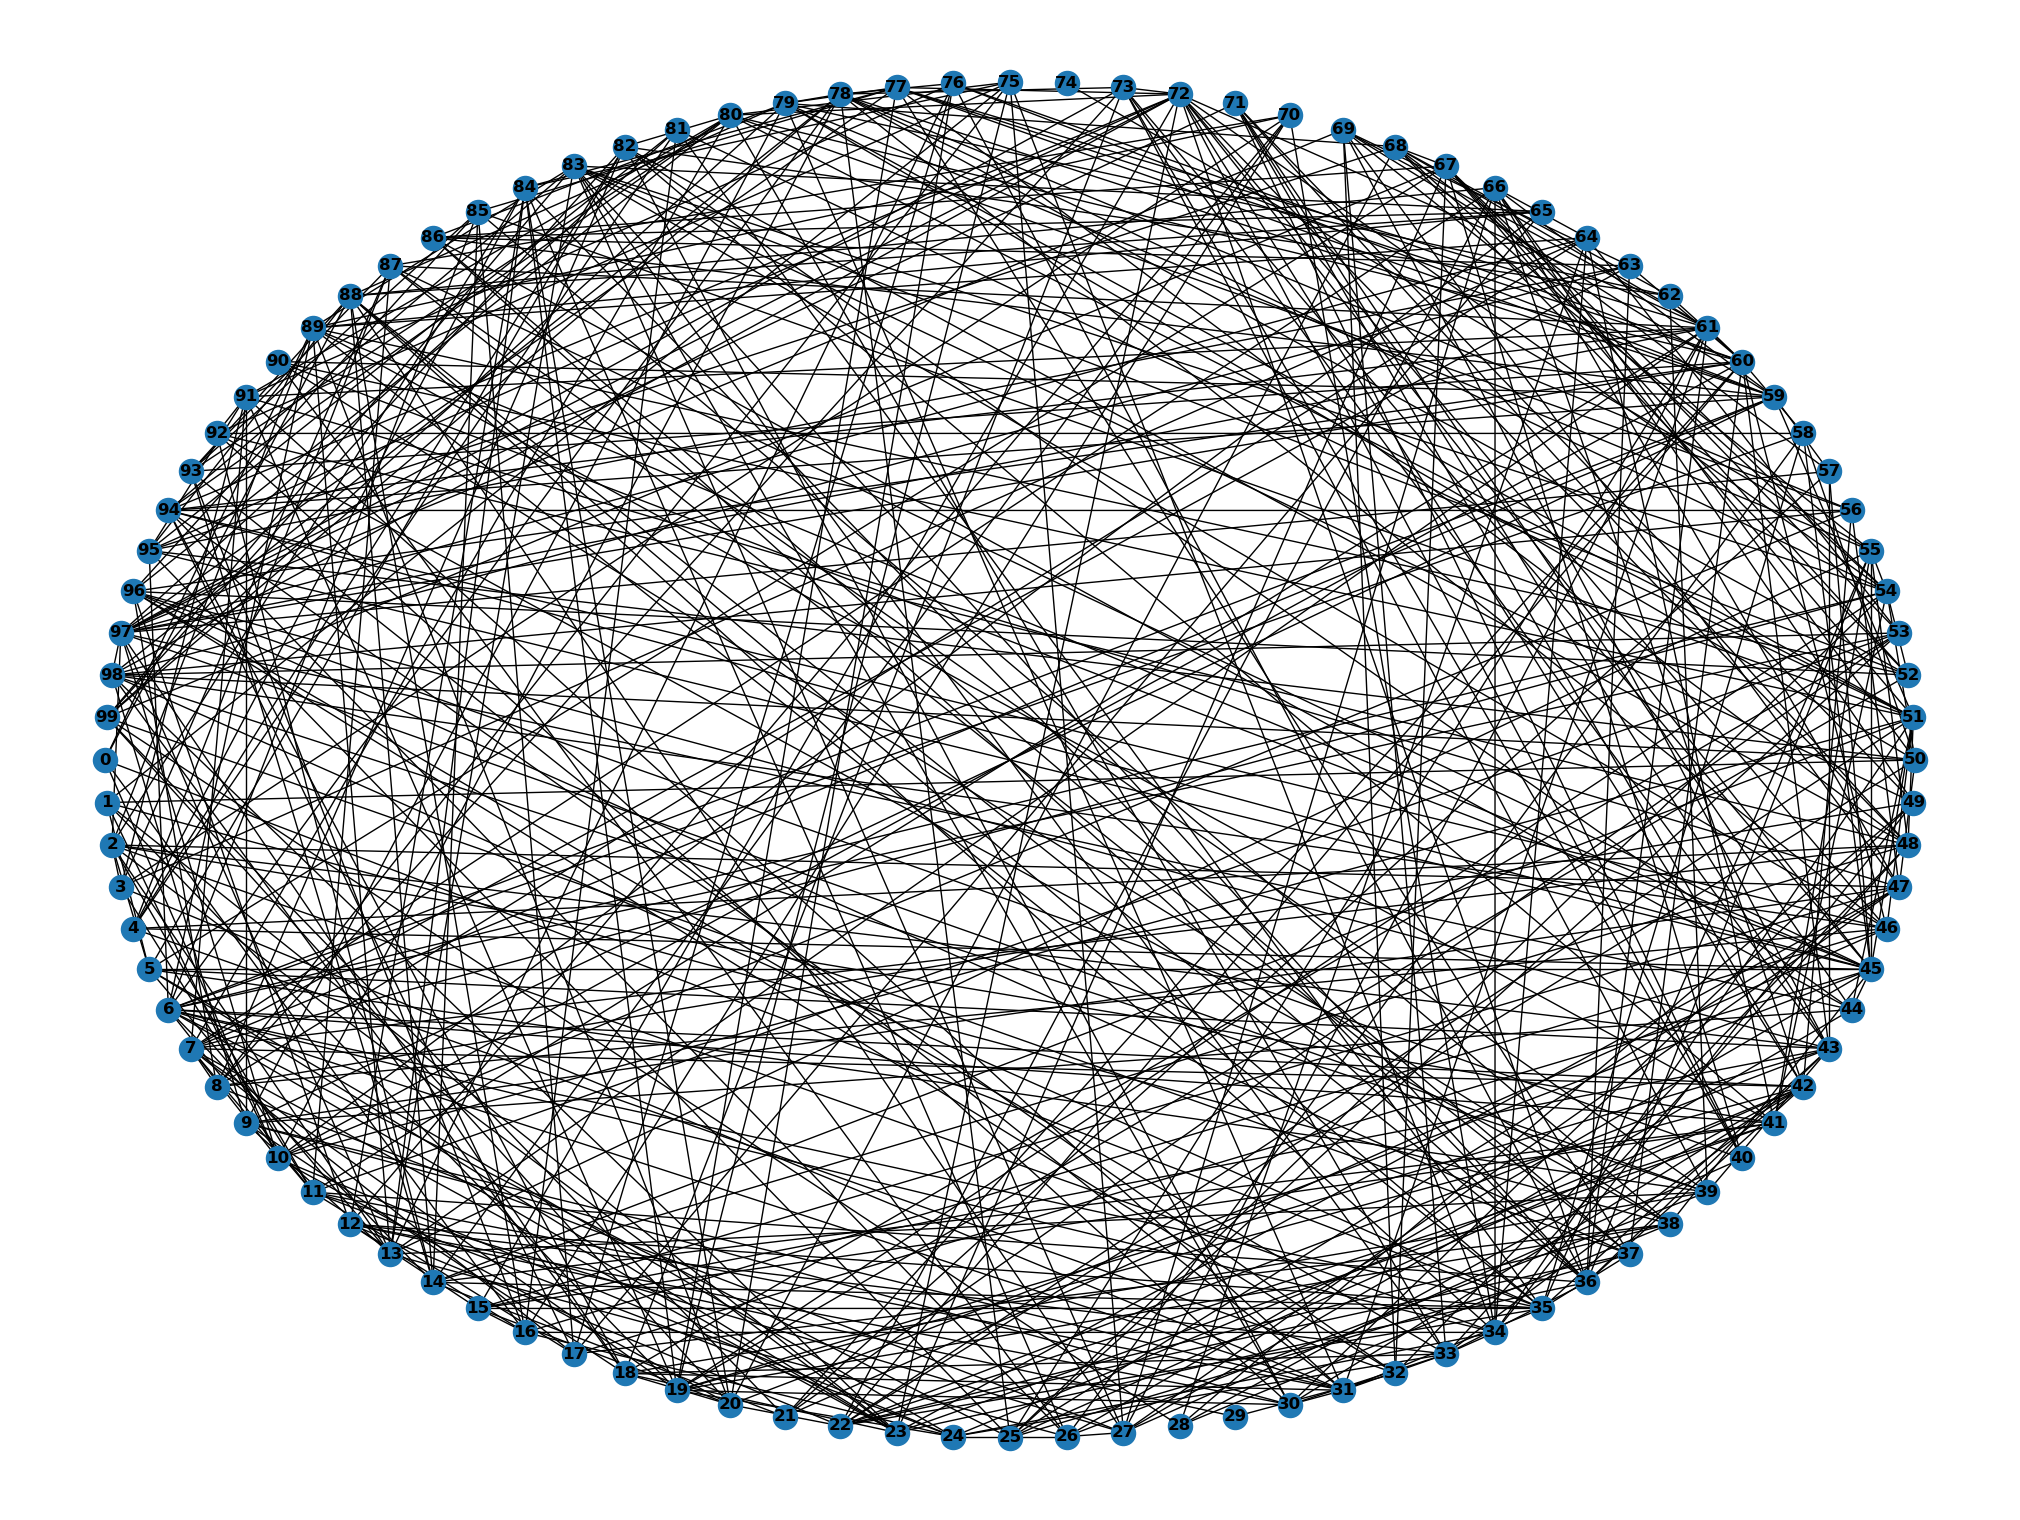

In [21]:
G = nx.dense_gnm_random_graph(100, 500)
for (u, v) in G.edges():
    G.edges[u,v]['weight'] = np.random.randint(0,10)

nx.draw_shell(G, with_labels=True, font_weight='bold')

## Generate random start vertex and measure time averaged 10 runs

In [22]:
v = np.random.randint(0, 100)
%timeit -n10 _ = nx.single_source_dijkstra_path(G, v)
%timeit -n10 _ = nx.single_source_bellman_ford_path(G, v)

494 µs ± 121 µs per loop (mean ± std. dev. of 7 runs, 10 loops each)
1.2 ms ± 45.4 µs per loop (mean ± std. dev. of 7 runs, 10 loops each)


## Generate 10x10 graph

In [37]:
blocked_cells = sample(range(0, 10**2), 30)
adj_matrix = np.zeros(shape=(10**2, 10**2))

for i in range(10**2):
  if i in blocked_cells:
    continue
  if i//10 !=0 and i-10 not in blocked_cells:
    adj_matrix[i, i-10] = 1
    adj_matrix[i-10, i] = 1
  if i//10 != (10 - 1) and i+10 not in blocked_cells:
    adj_matrix[i, i+10] = 1
    adj_matrix[i+10, i] = 1
  if i%10 != 0 and i-1 not in blocked_cells:
    adj_matrix[i, i-1] = 1
    adj_matrix[i-1, i] = 1
  if i%10 != (10-1) and i+1 not in blocked_cells:
    adj_matrix[i, i+1] = 1
    adj_matrix[i+1, i] = 1

graph = nx.Graph(adj_matrix)
for i in range(10**2):
  graph.nodes[i]["coord"] = (i//10 + 1, i%10 + 1)

## Visualize graph

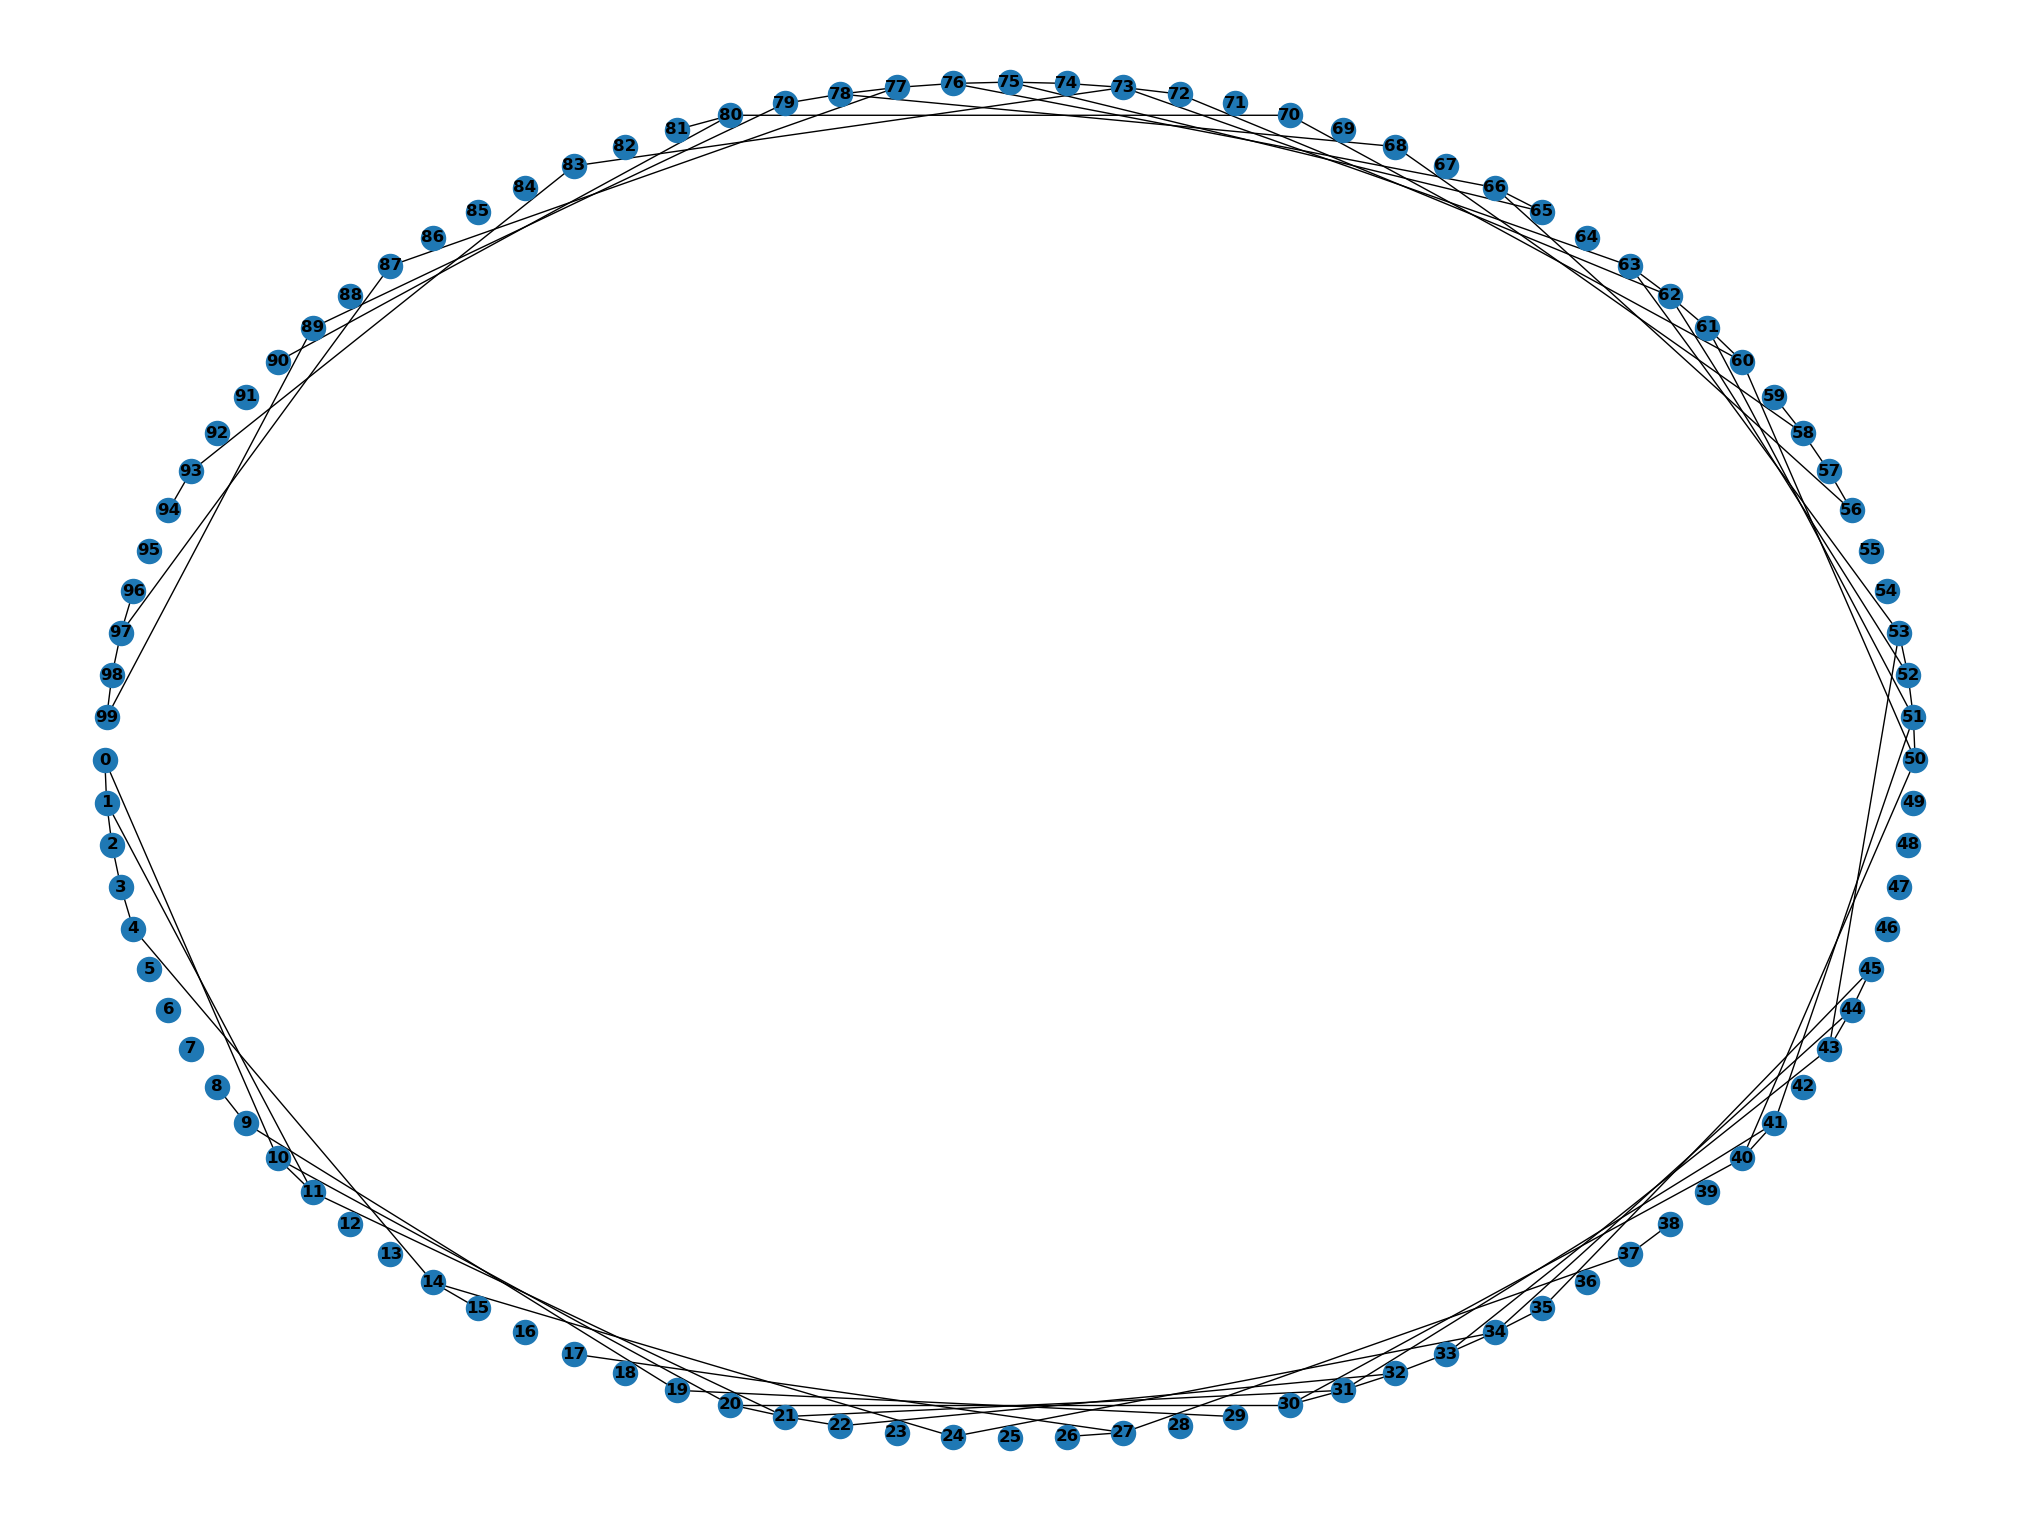

In [41]:
nx.draw_shell(graph, with_labels=True, font_weight='bold')

## Convert to grid and visualize it

In [43]:
grid = np.zeros(shape=(10, 10))
for i in range(10**2):
  if i not in blocked_cells:
    grid[i//10, i%10] = 1

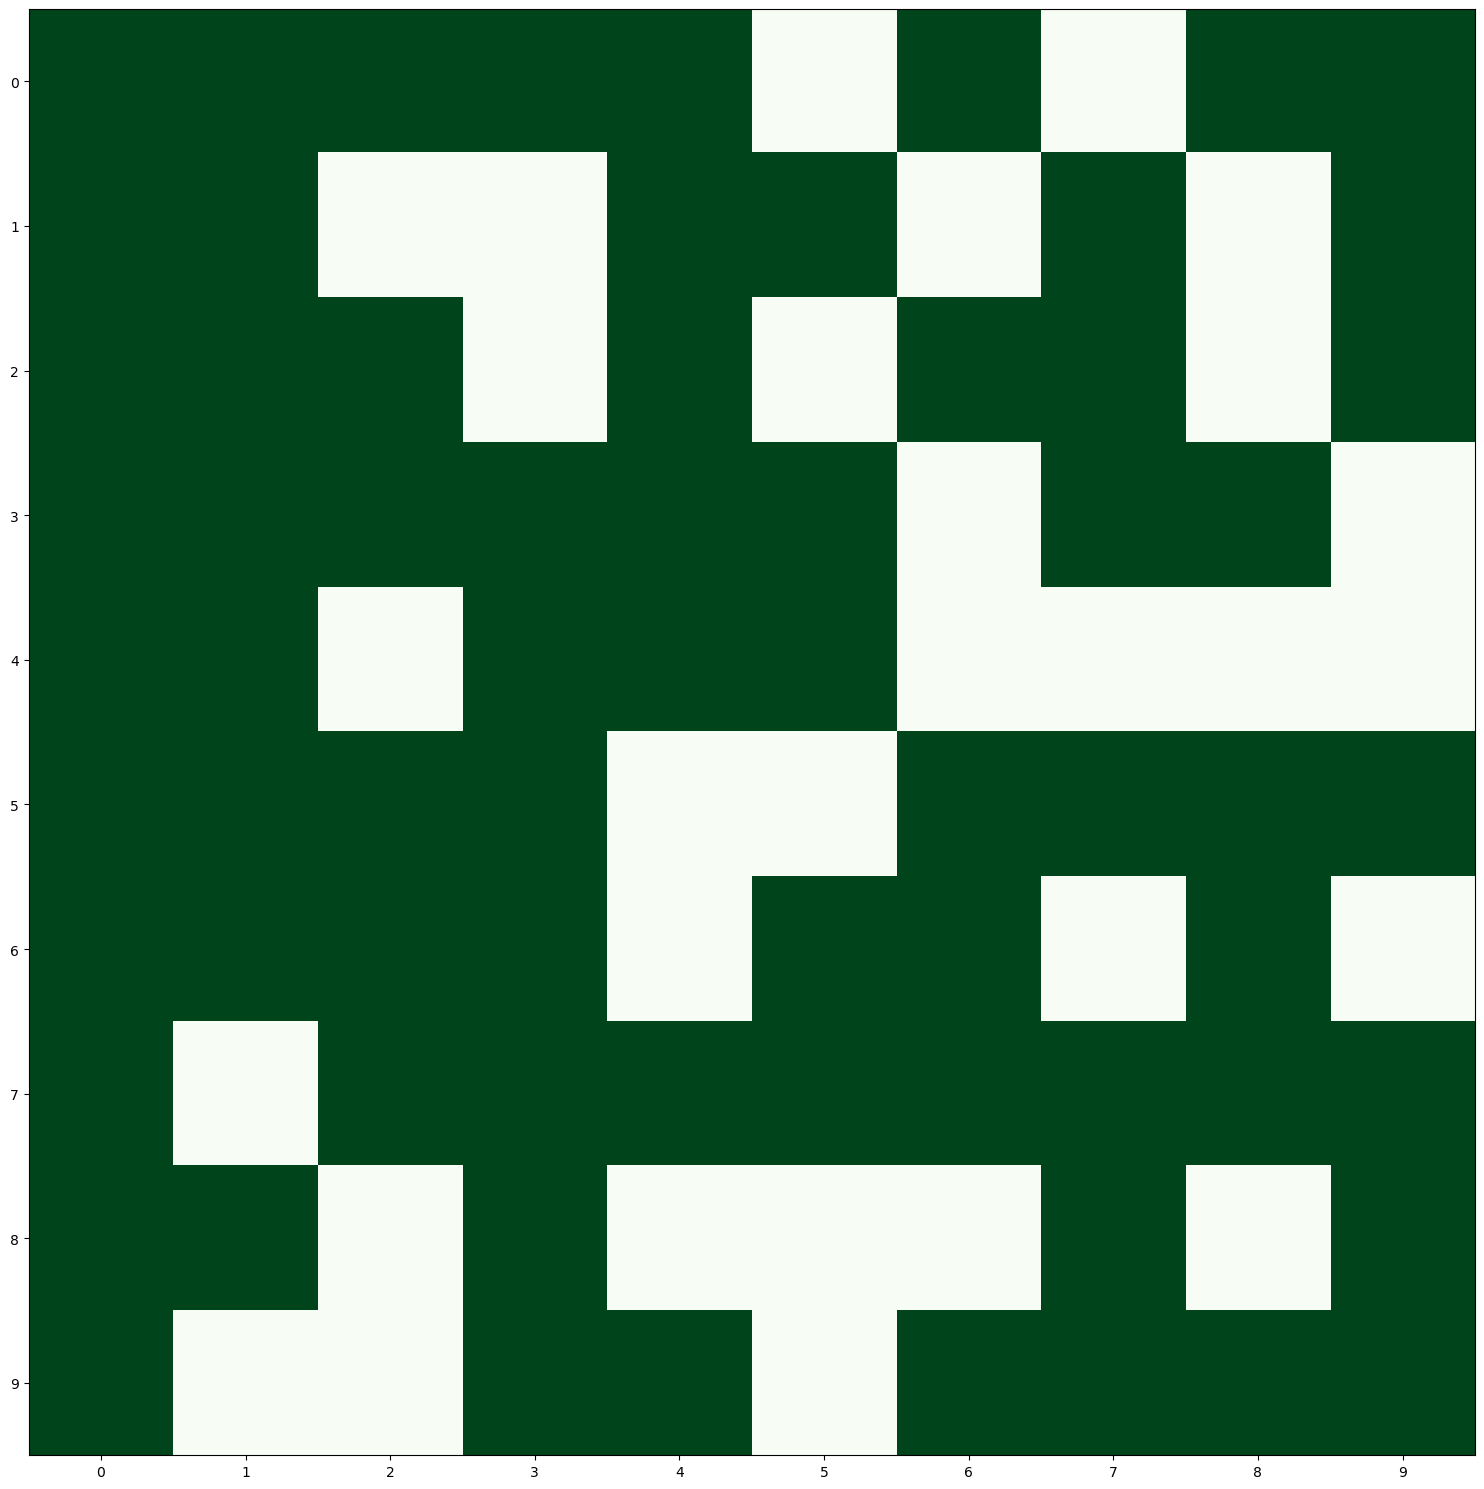

In [47]:
fig, ax = plt.subplots()
im = ax.imshow(grid,cmap=plt.get_cmap('Greens'))

ax.set_xticks(np.arange(10))
ax.set_yticks(np.arange(10))

fig.tight_layout()
plt.show()
  

## Write function for A*

In [141]:
def astar(graph, start, end):
    def h(v, u):
      dx = abs(graph.nodes[v]["coord"][0] - graph.nodes[u]["coord"][0])
      dy = abs(graph.nodes[v]["coord"][1] - graph.nodes[u]["coord"][1])
      return dx+dy

    path = []
    try:
      path = nx.astar_path(graph, start, end, h)
    except nx.exception.NetworkXNoPath as e:
      print(e)
      print("No path found between two nodes")
    return path

In [142]:
## Generates random start and end
def generate_random(blocked_cells):
    start = end = False
    while not (start and end):
      if not start:
        start_node = np.random.randint(0, 10**2)
      if start_node not in blocked_sells and not start:
        start = True

      if not end:
        end_node = np.random.randint(0, 10**2)
      if end_node not in blocked_sells and not end:
        end = True
    return start_node, end_node

## Find path

In [144]:
start, end = generate_random(blocked_cells)
path = astar(graph,start, end)
print(f"Path between {start//10, start%10}\
            and {end//10, end%10} is {path}")

Path between (9, 7)            and (5, 9) is [97, 87, 77, 78, 68, 58, 59]


## Draw path

In [145]:
def draw_path(path, start,end):
    if len(path)==0:
        g = dp(grid)
        g[start//10, start%10] = 0.75
        g[end//10, end%10] = 0.75
    else: 
        start = path[0]
        end = path[-1]

        g = dp(grid)

        for step in path:
          g[step//10, step%10] = 0.5

        g[start//10, start%10] = 0.75
        g[end//10, end%10] = 0.75

    fig, ax = plt.subplots()
    im = ax.imshow(g,cmap=plt.get_cmap('Greens'))

    ax.set_xticks(np.arange(10))
    ax.set_yticks(np.arange(10))

    fig.tight_layout()
    plt.show()

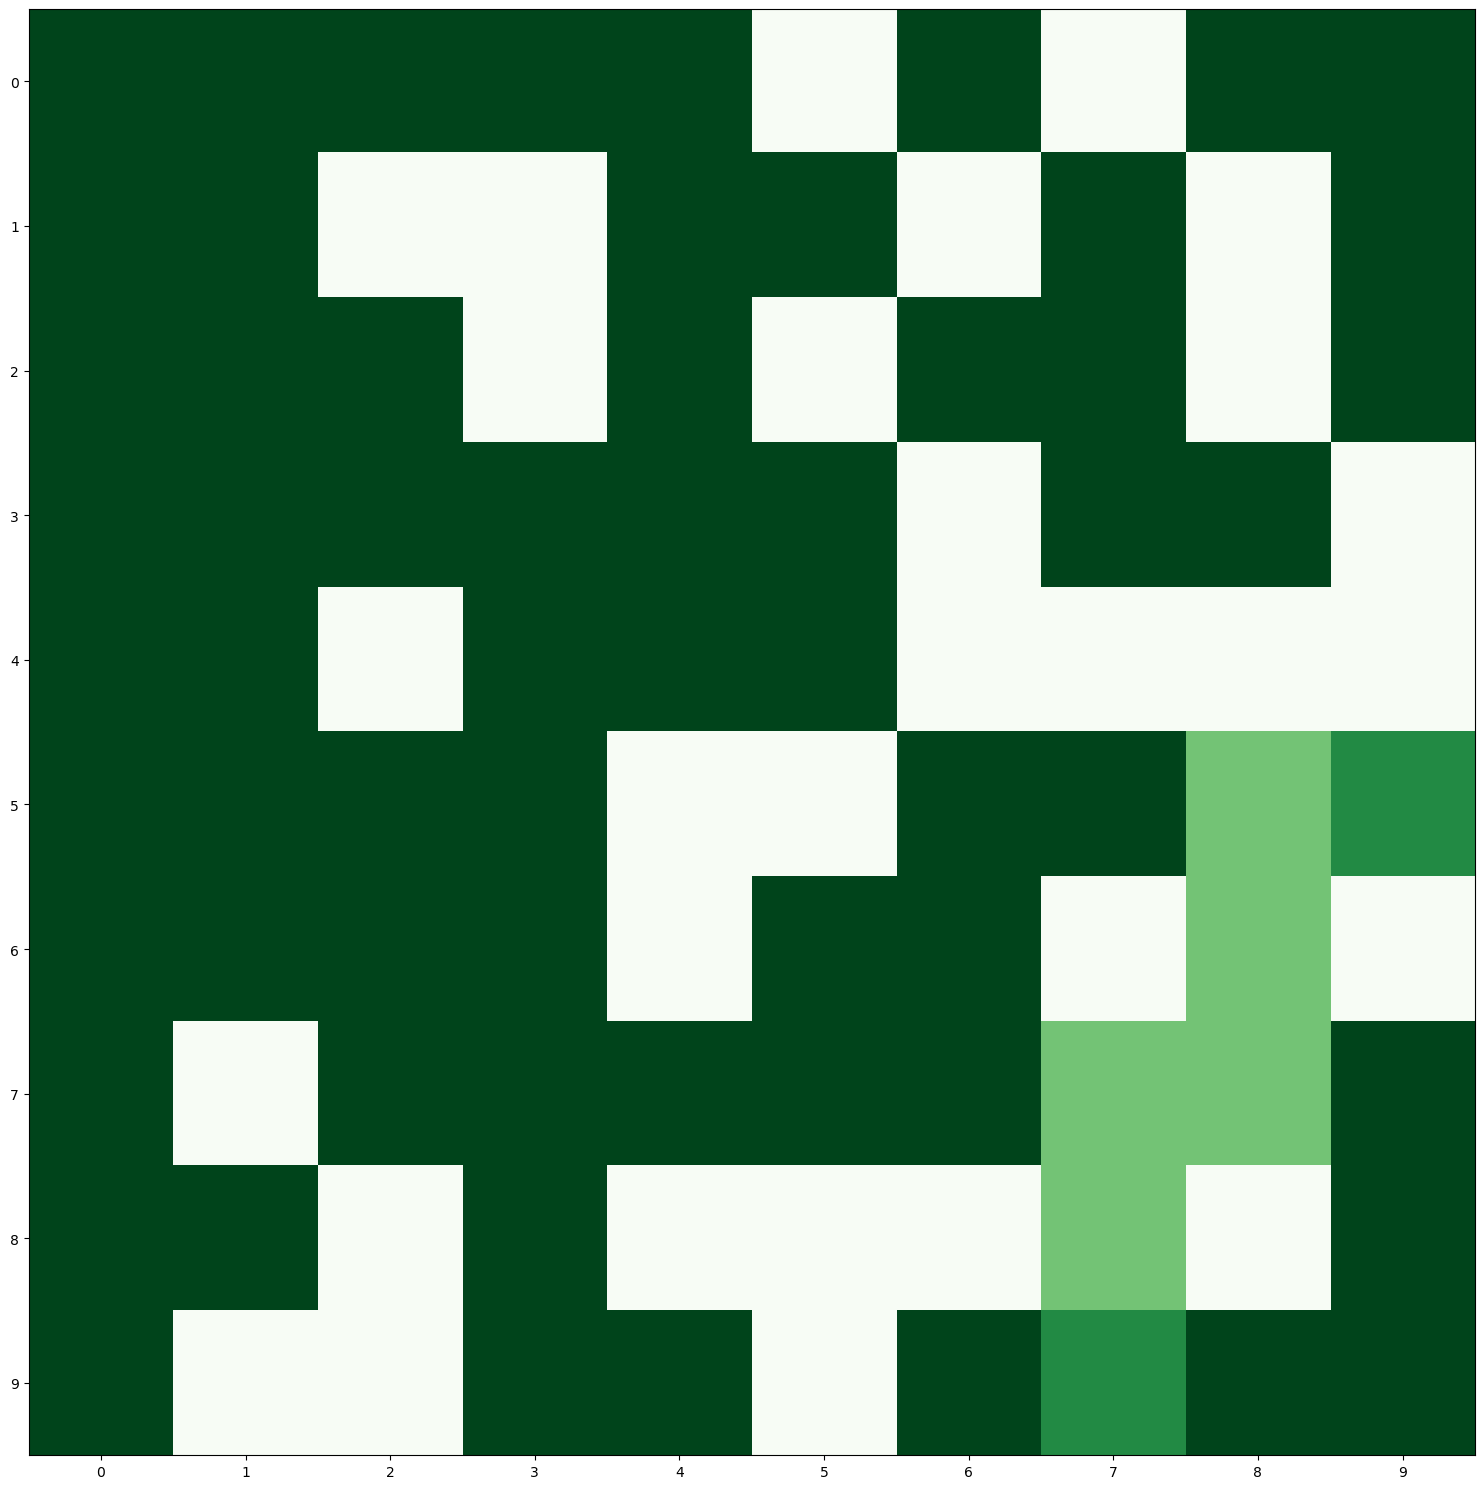

In [146]:
draw_path(path,start,end)

Path between (4, 0)            and (9, 9) is [40, 41, 51, 52, 53, 63, 73, 74, 75, 76, 77, 78, 79, 89, 99]


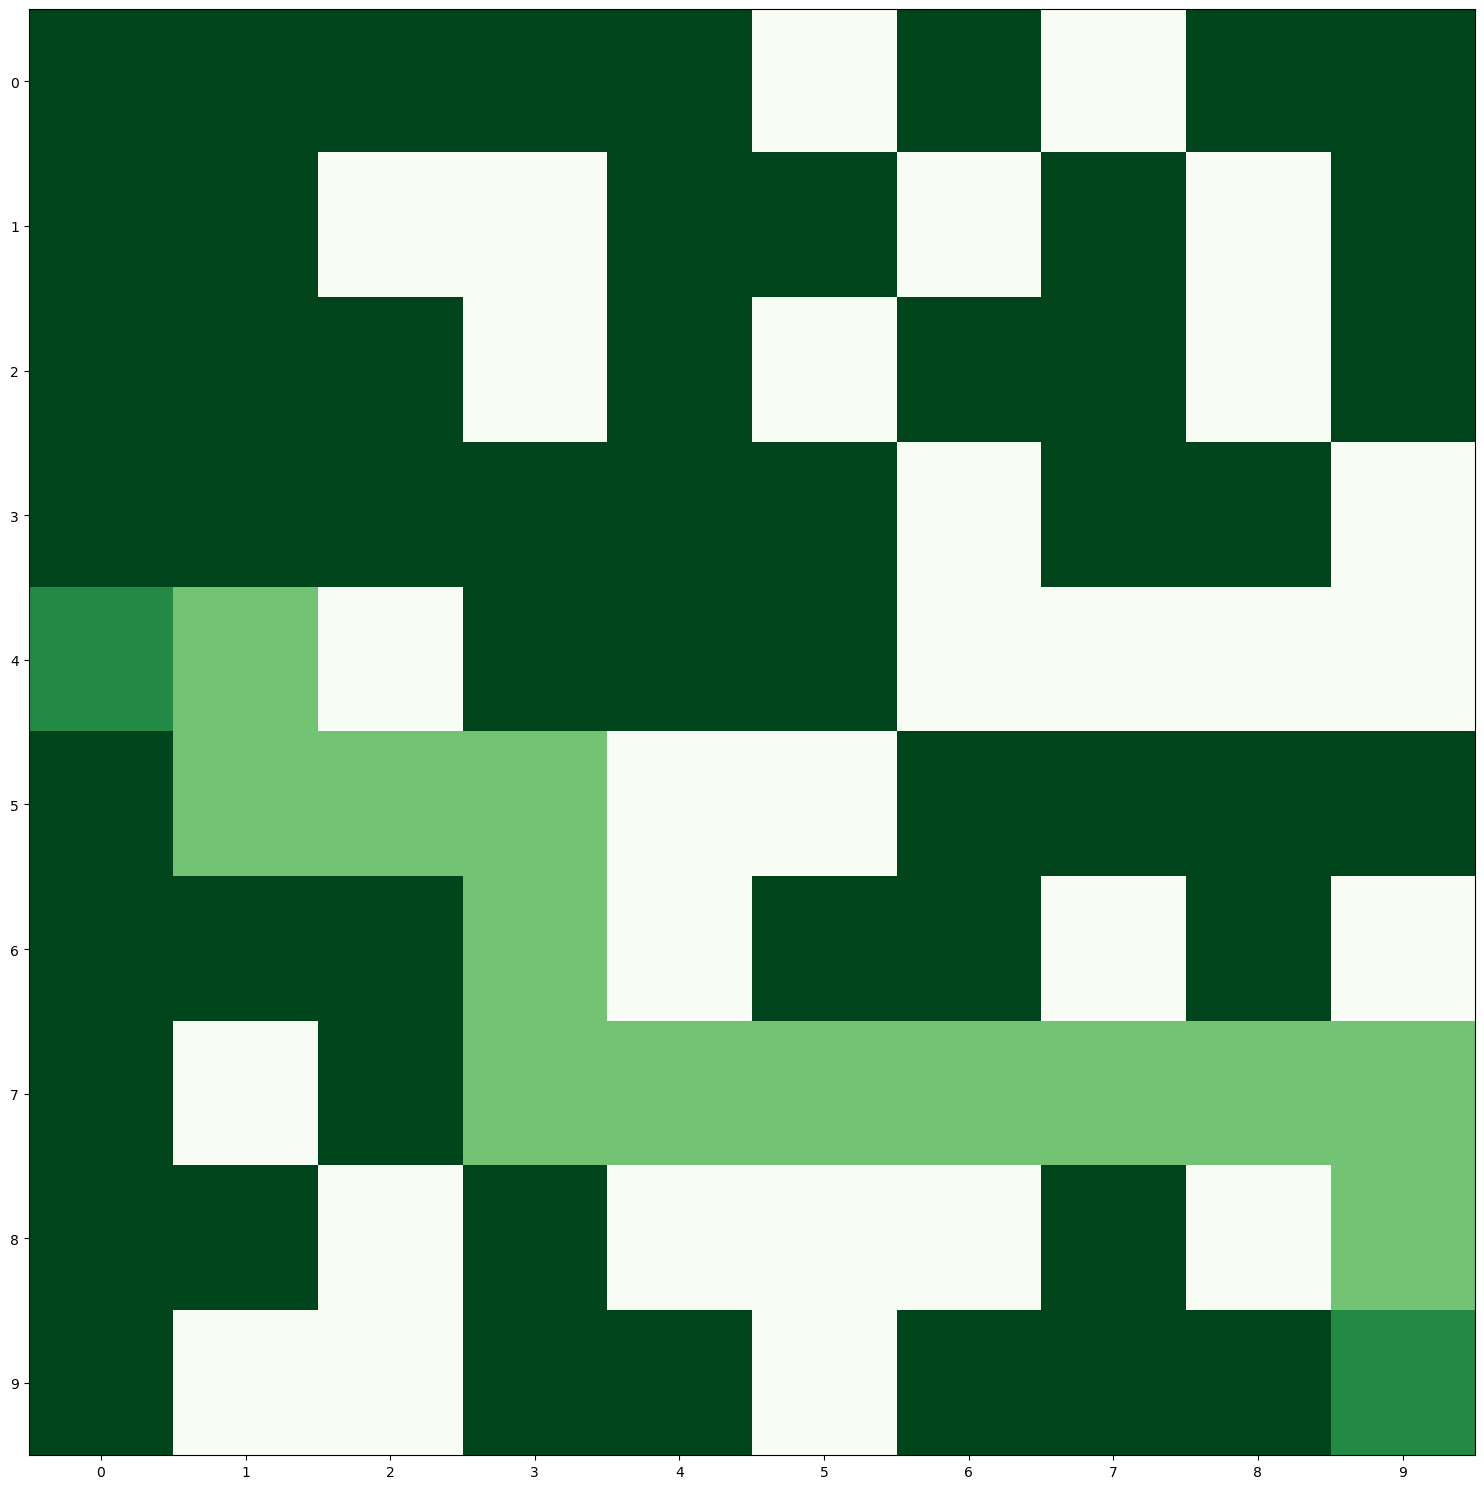

In [148]:
start, end = generate_random(blocked_cells)
path = astar(graph,start, end)
print(f"Path between {start//10, start%10}\
            and {end//10, end%10} is {path}")
draw_path(path,start,end)

Path between (4, 3)            and (7, 5) is [43, 53, 63, 73, 74, 75]


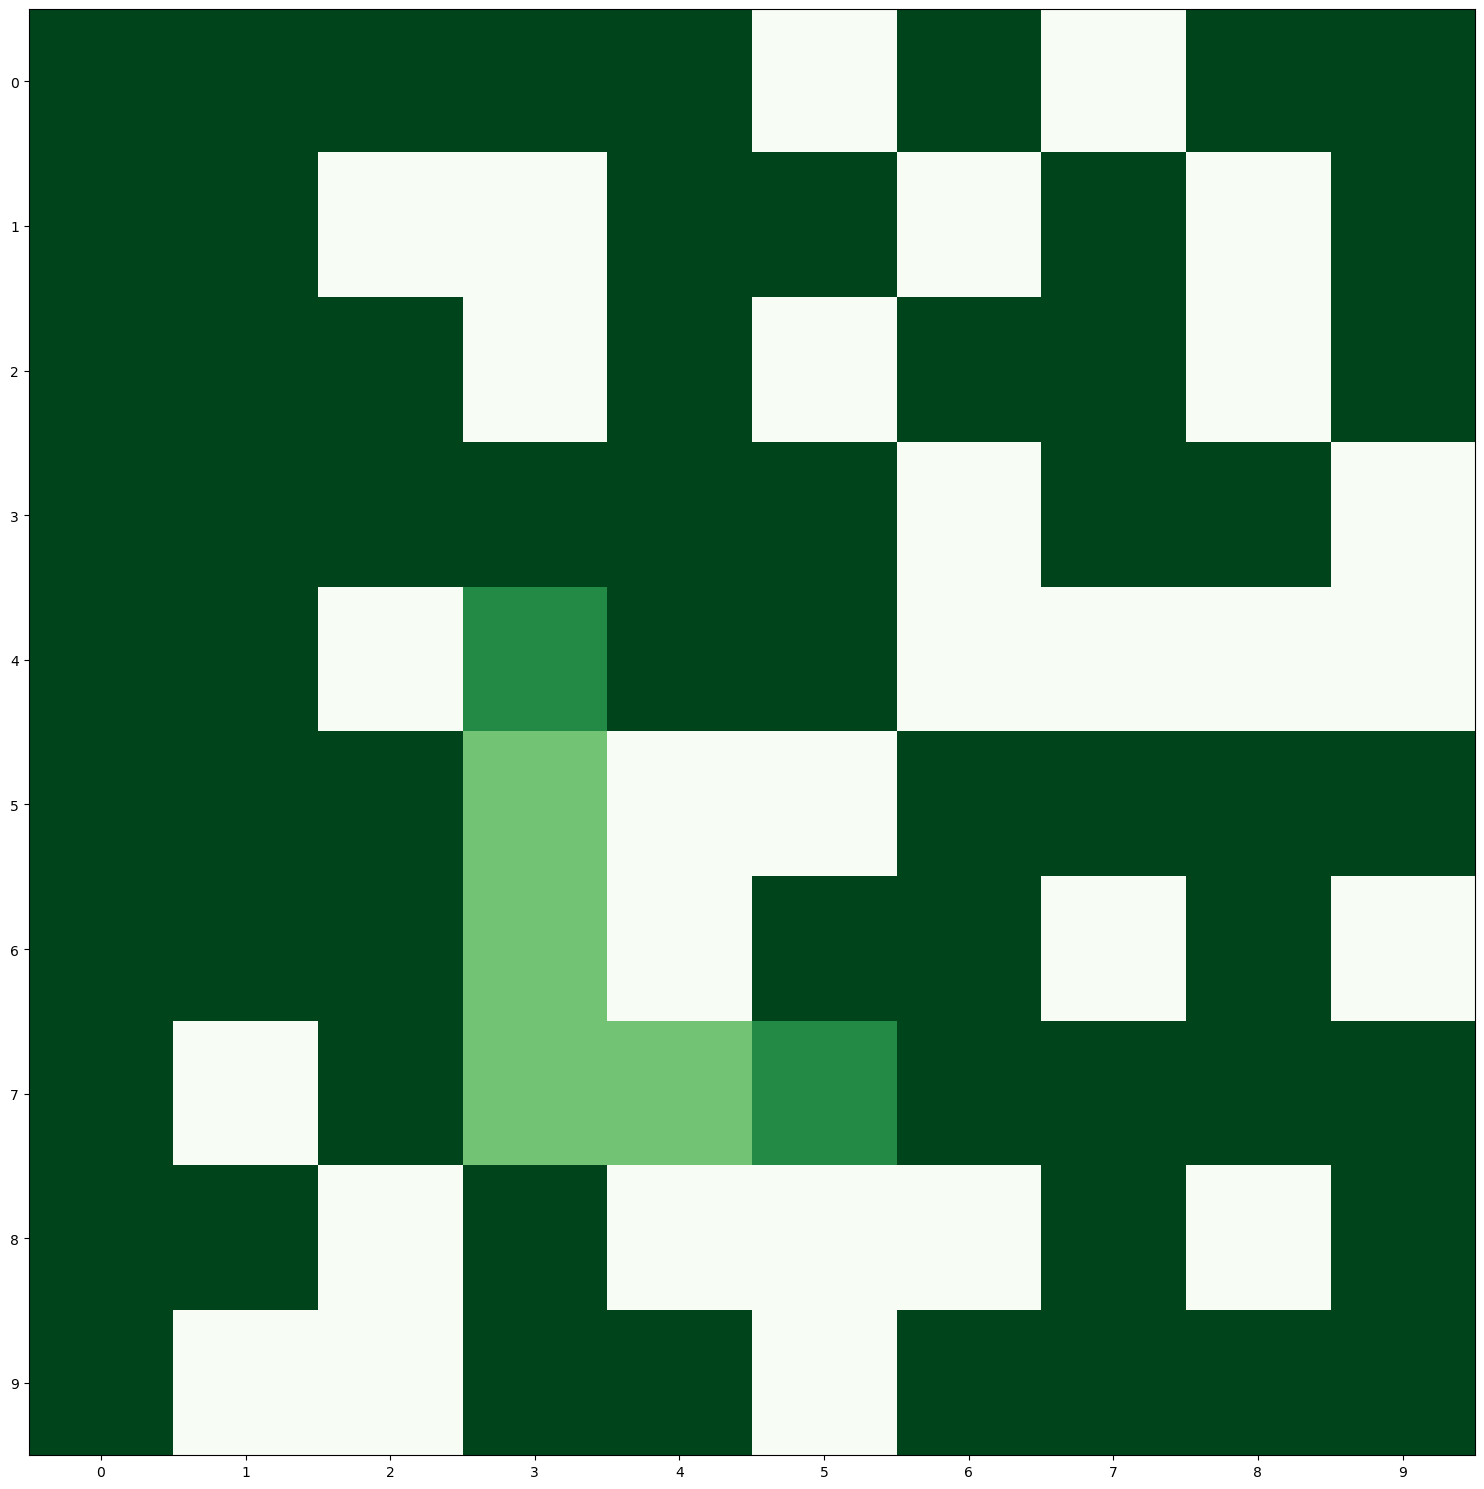

In [152]:
start, end = generate_random(blocked_cells)
path = astar(graph,start, end)
print(f"Path between {start//10, start%10}\
            and {end//10, end%10} is {path}")
draw_path(path,start,end)

Node 79 not reachable from 28
No path found between two nodes
Path between (2, 8)            and (7, 9) is []


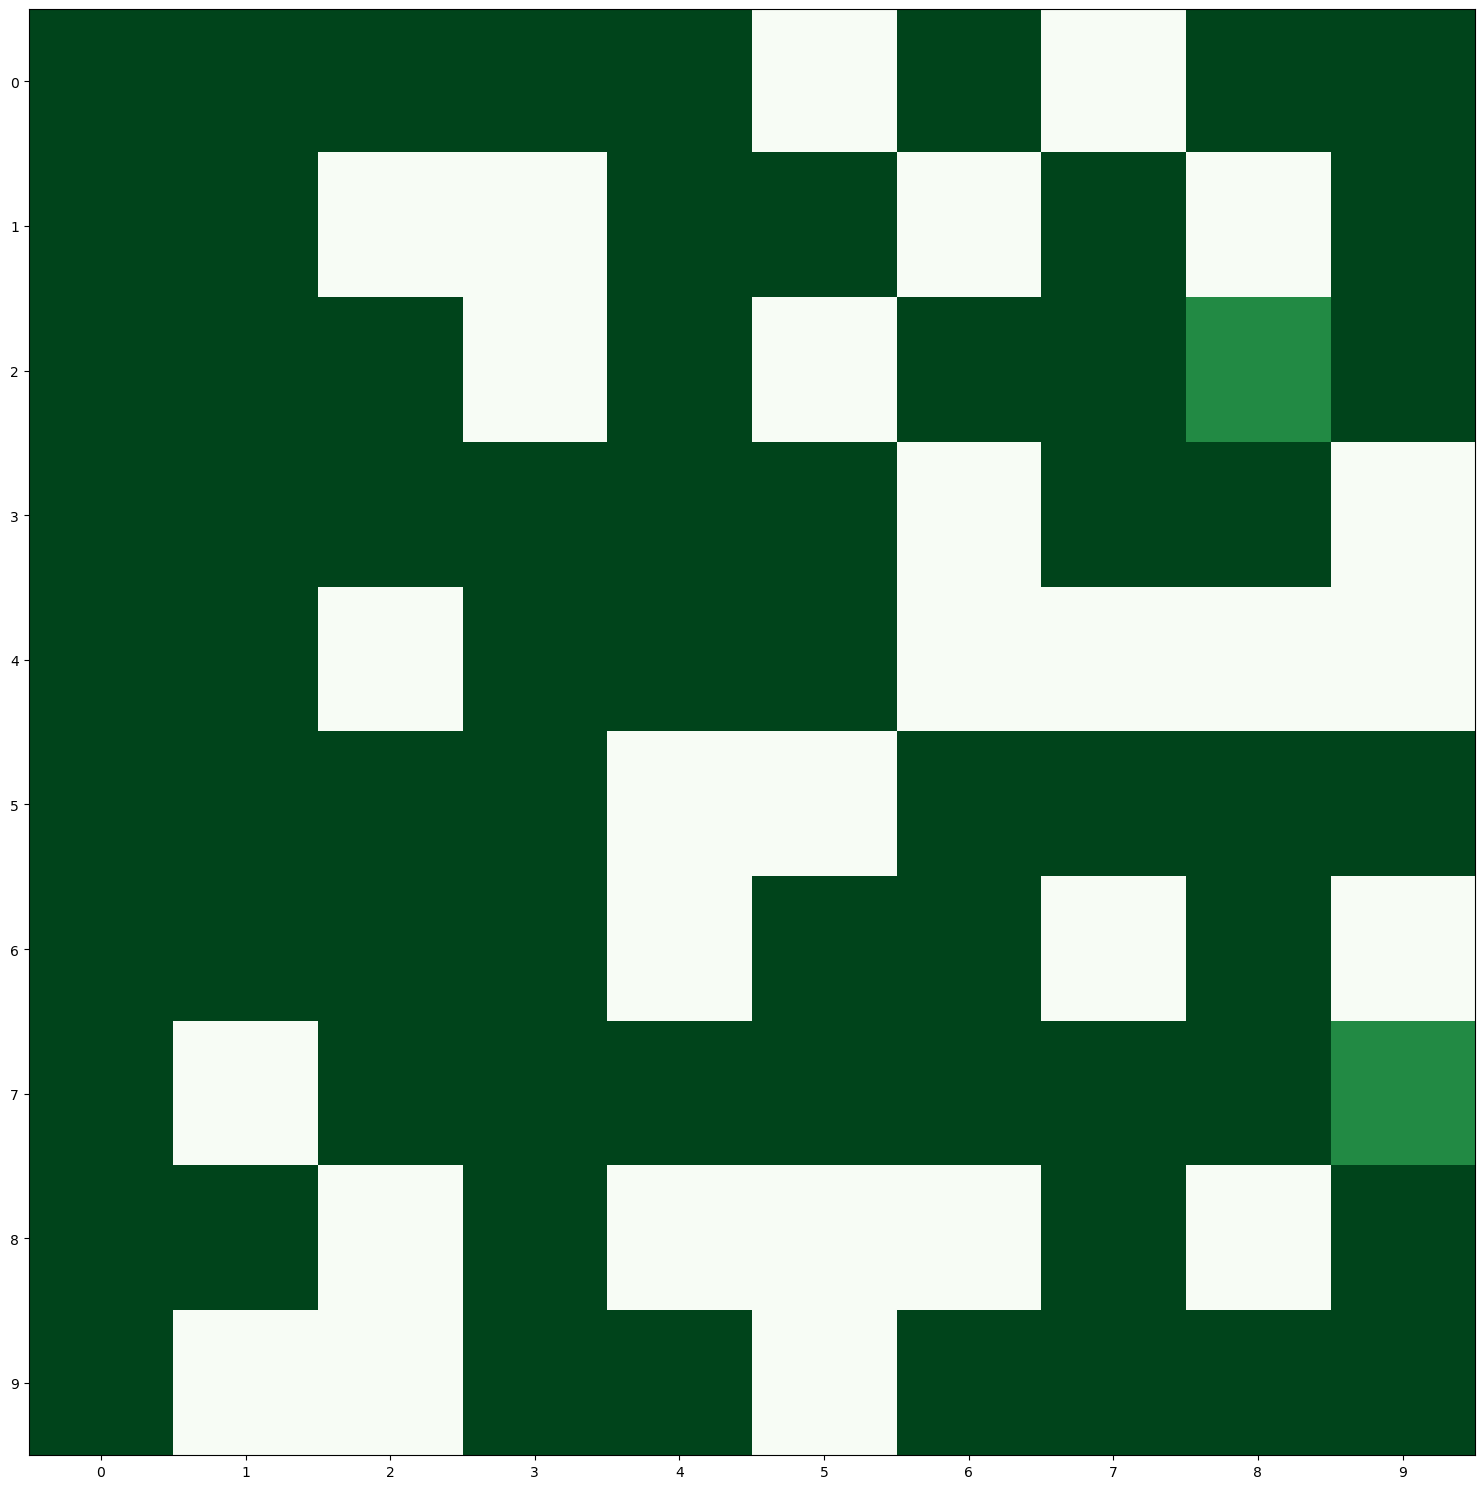

In [154]:
start, end = generate_random(blocked_cells)
path = astar(graph,start, end)
print(f"Path between {start//10, start%10}\
            and {end//10, end%10} is {path}")
draw_path(path,start,end)

Path between (2, 0)            and (7, 2) is [20, 21, 31, 41, 51, 52, 62, 72]


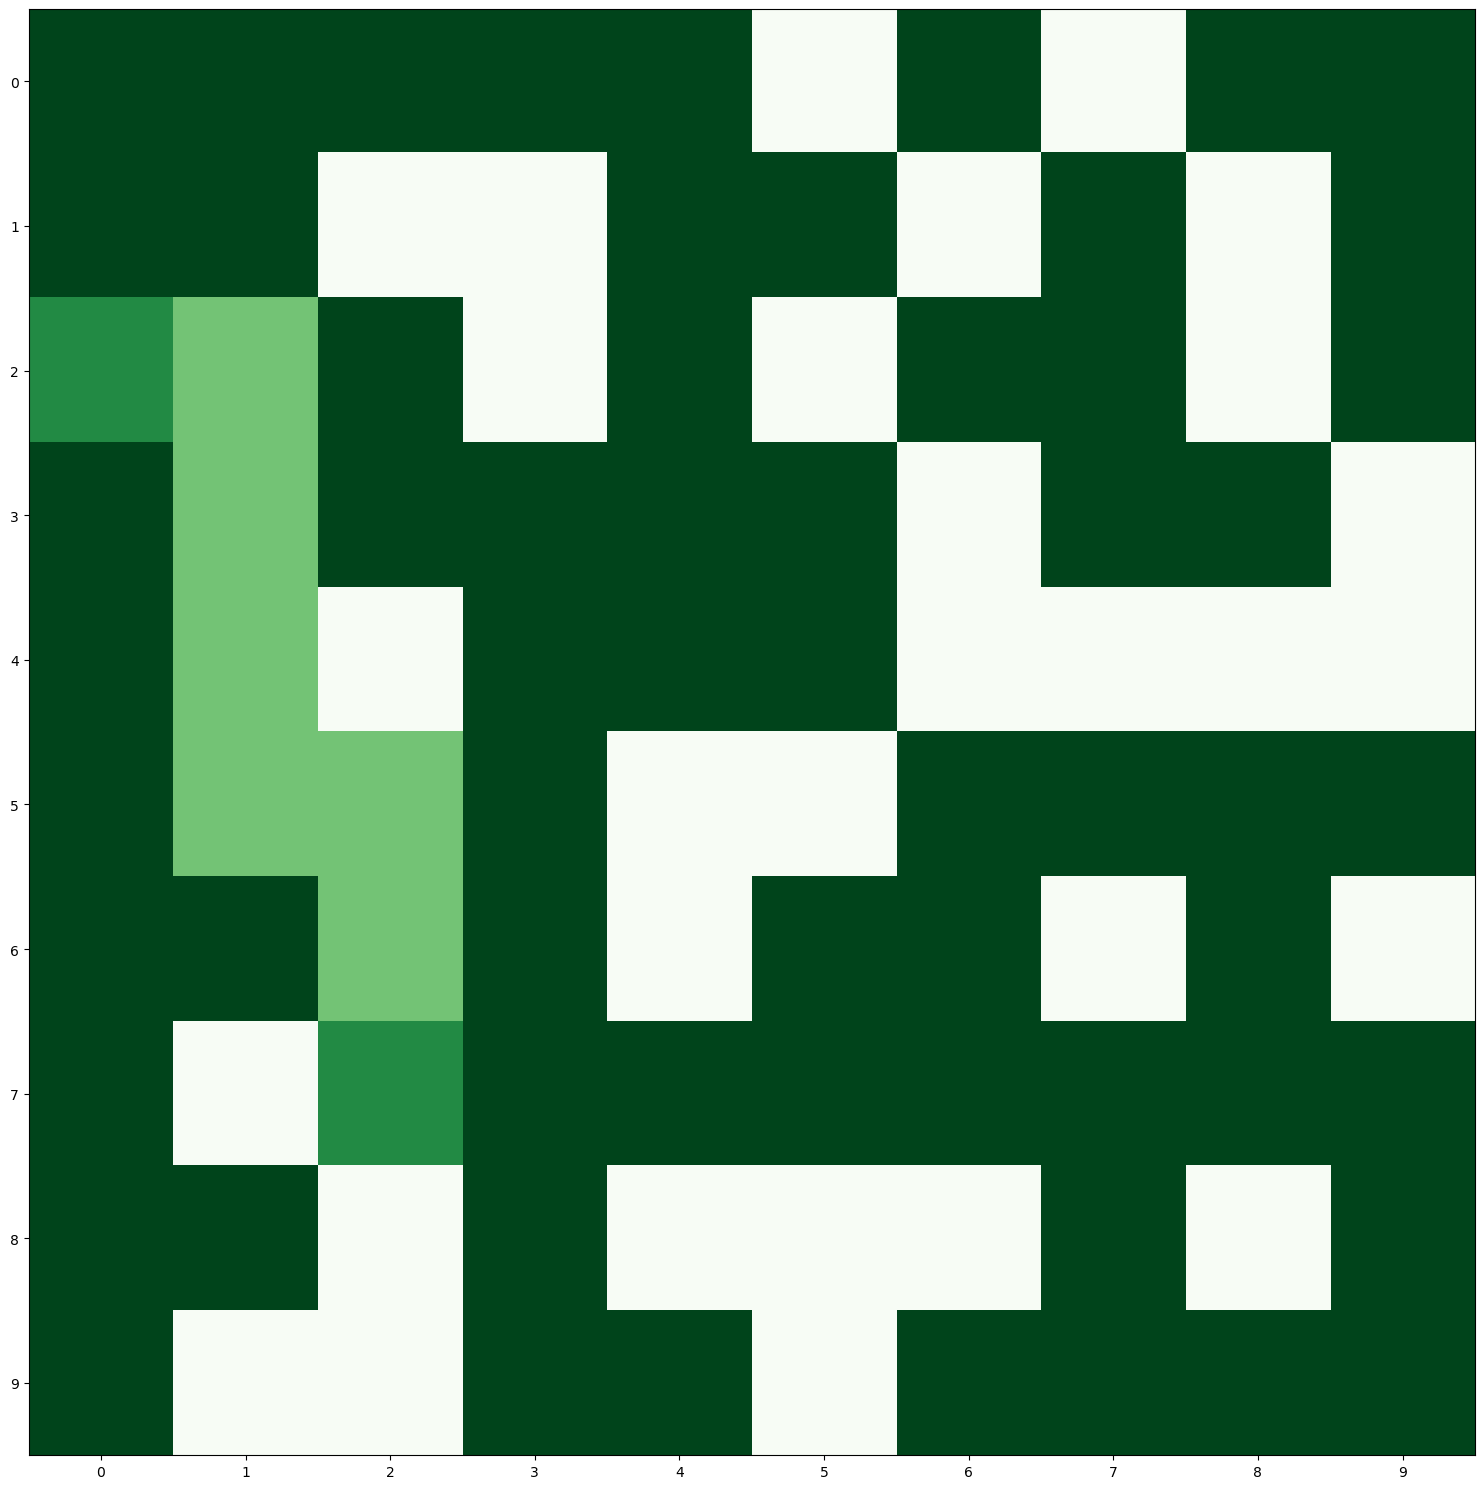

In [158]:
start, end = generate_random(blocked_cells)
path = astar(graph,start, end)
print(f"Path between {start//10, start%10}\
            and {end//10, end%10} is {path}")
draw_path(path,start,end)

Path between (9, 0)            and (7, 5) is [90, 80, 70, 60, 61, 62, 63, 73, 74, 75]


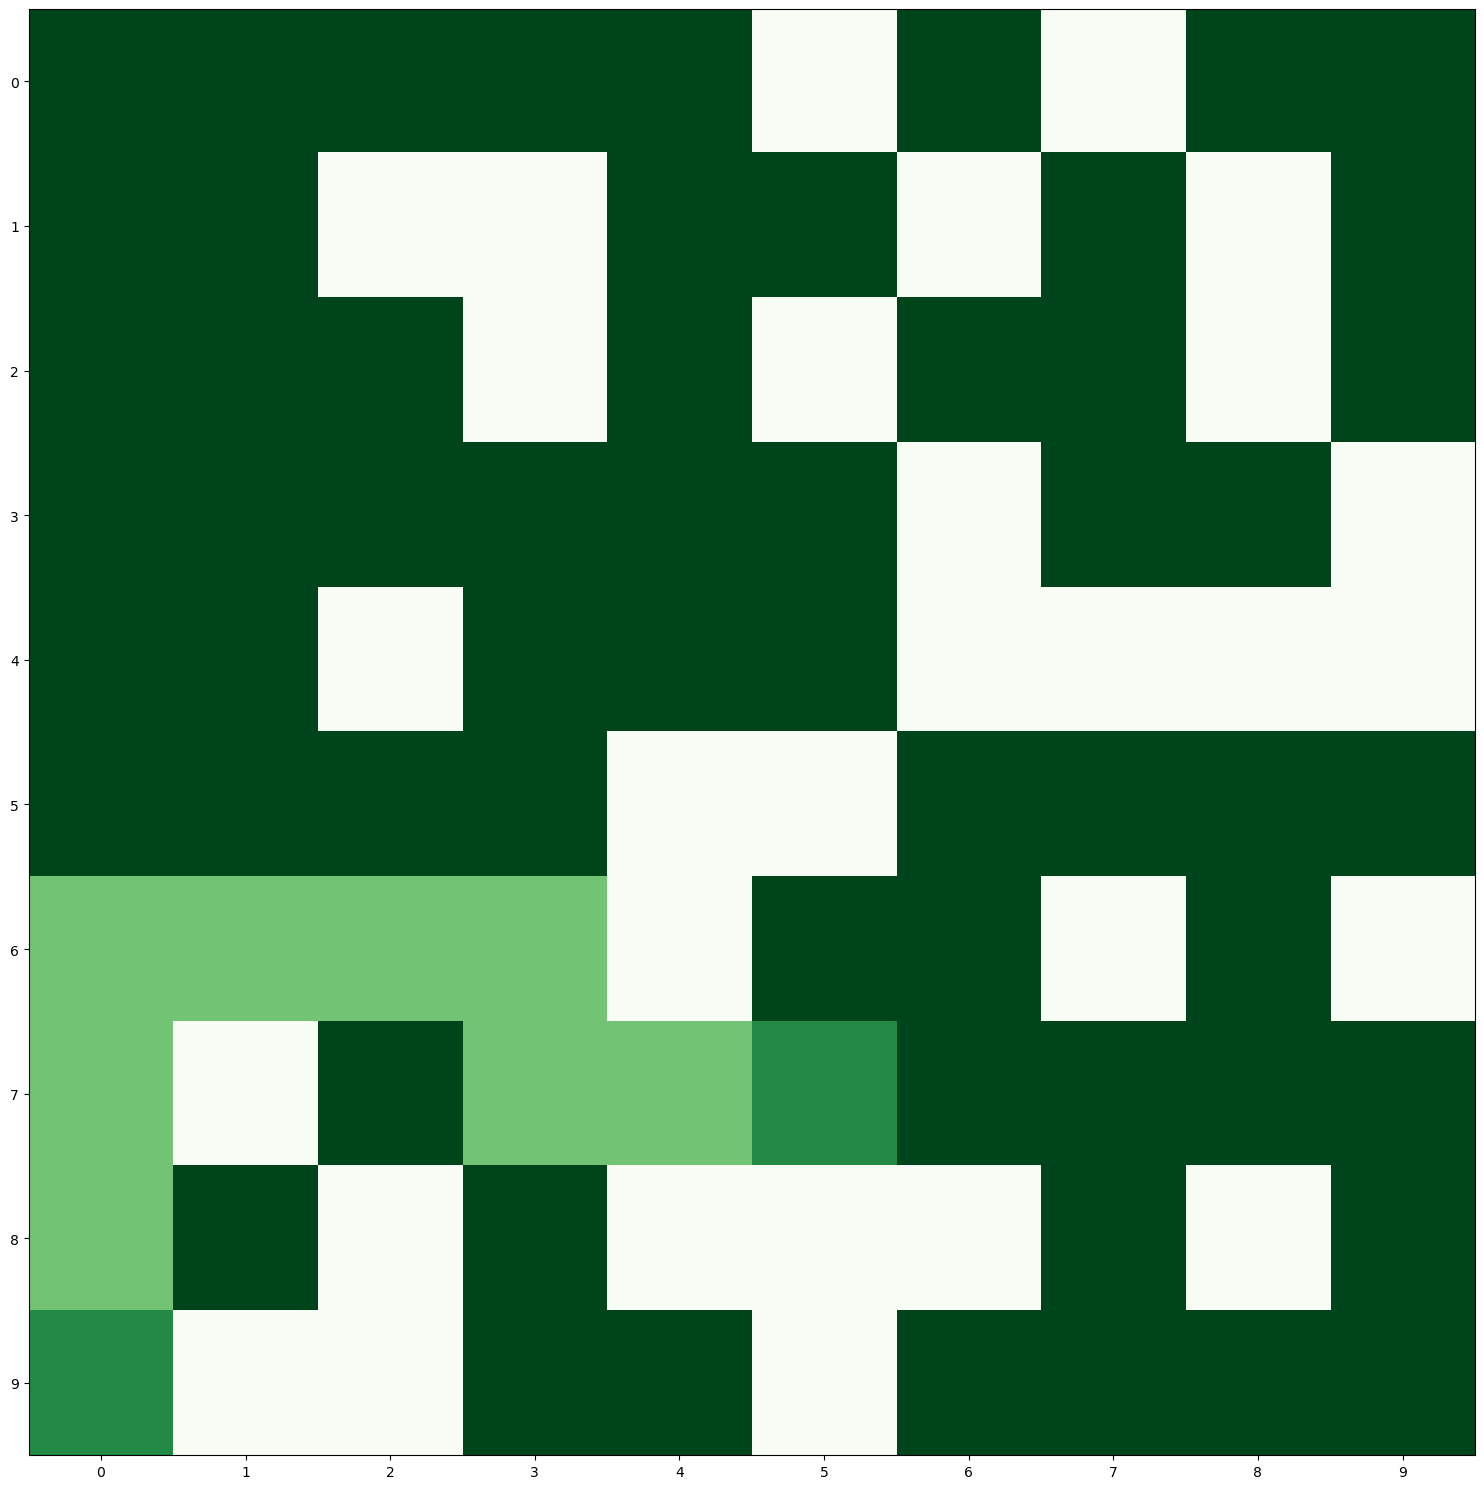

In [160]:
start, end = generate_random(blocked_cells)
path = astar(graph,start, end)
print(f"Path between {start//10, start%10}\
            and {end//10, end%10} is {path}")
draw_path(path,start,end)